<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Chap -4- Machine learning applications/5- Apprentissage Non-supervisé.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apprentissage Non-Supervisé

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Clustering
### Kmean Algorithm

In [7]:
from sklearn.cluster import KMeans

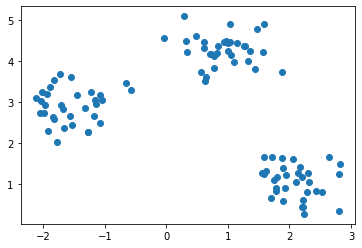

In [2]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

-30.870531280140696

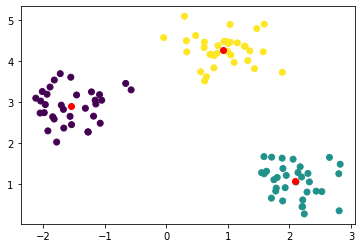

In [4]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

### Elbow Method

Text(0, 0.5, 'Cout du modele (Inertia)')

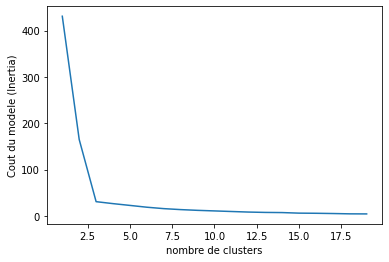

In [6]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

### Autre methode de clustering

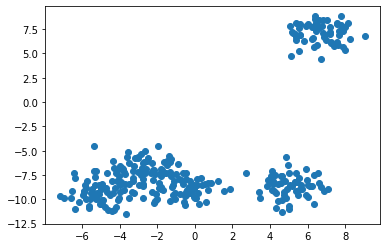

In [8]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering,SpectralClustering
from sklearn import metrics
X, y = make_blobs(n_samples=300, centers=5, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1])

Estimated number of clusters: 10
Estimated number of noise points: 90
Homogeneity: 0.602
Completeness: 0.499
V-measure: 0.546
Adjusted Rand Index: 0.306
Adjusted Mutual Information: 0.526
Silhouette Coefficient: 0.057


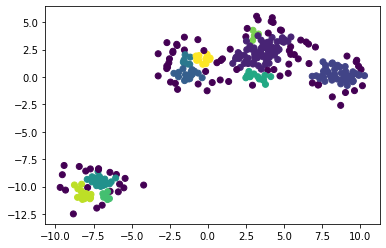

In [5]:
model = DBSCAN().fit(X)

core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

plt.scatter(X[:,0], X[:,1],c=model.fit_predict(X))

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


60


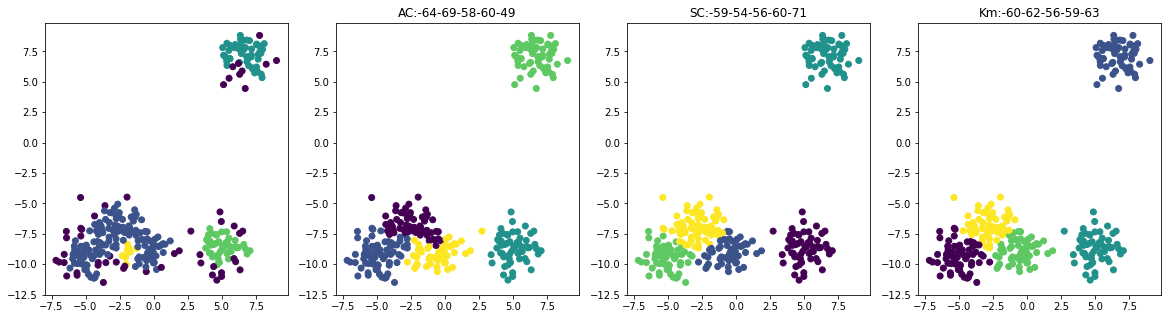

In [9]:
plt.figure(figsize=(20,5))
model = DBSCAN(eps=0.6).fit(X)
plt.subplot(1,4,1)
plt.scatter(X[:,0], X[:,1],c=model.fit_predict(X))


model = AgglomerativeClustering(n_clusters=5).fit(X)
plt.subplot(1,4,2)
plt.scatter(X[:,0], X[:,1],c=model.fit_predict(X))
R =model.fit_predict(X)
s='AC:'
for i in range(0,5):
    s+= f'-{R[R[:]==i].size}'
plt.title(s)

model = SpectralClustering(n_clusters=5).fit(X)
plt.subplot(1,4,3)
plt.scatter(X[:,0], X[:,1],c=model.fit_predict(X))
R =model.fit_predict(X)
s='SC:'
for i in range(0,5):
    s+= f'-{R[R[:]==i].size}'
plt.title(s)

model = KMeans(n_clusters=5).fit(X)
plt.subplot(1,4,4)
plt.scatter(X[:,0], X[:,1],c=model.fit_predict(X))
R =model.fit_predict(X)
s='Km:'
for i in range(0,5):
    s+= f'-{R[R[:]==i].size}'
plt.title(s)

print(R[R[:]==0].size)


## Detection d'anomalies avec Isolation Forest

In [22]:
from sklearn.ensemble import IsolationForest

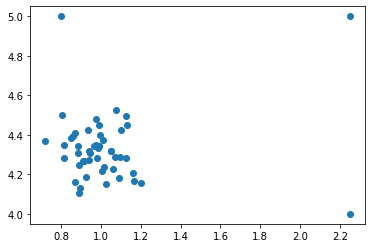

In [25]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])
X[-2,:] = np.array([2.25, 4])
X[-3,:] = np.array([0.8, 5])

plt.scatter(X[:,0], X[:, 1])

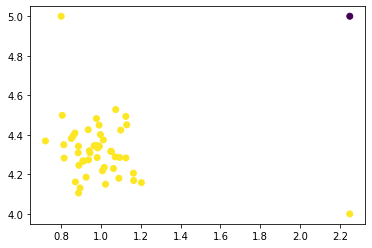

In [28]:
model = IsolationForest(contamination=3/300)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

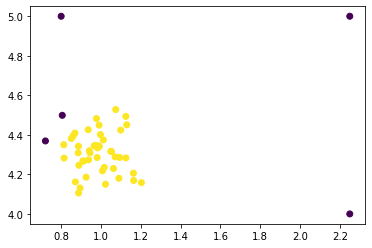

In [34]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=5).fit(X)
plt.scatter(X[:,0], X[:, 1], c=model.fit_predict(X))


### Application : Digits Outliers

(1797, 64)


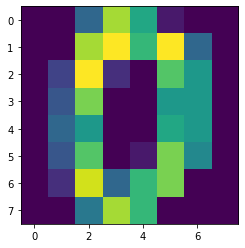

In [38]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target
print(X.shape)
plt.imshow(images[0])

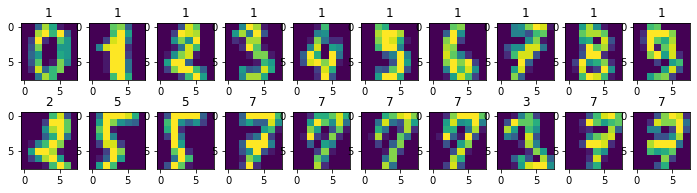

In [21]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)

Good = model.predict(X)  
plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(2, 10, i+1)
  plt.imshow(images[i])
  plt.title(y[Good][i])
outliers = model.predict(X) == -1 
for i in range(10):
  plt.subplot(2, 10, 10+i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## Reduction de dimension

### Visualisation 2D

In [39]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

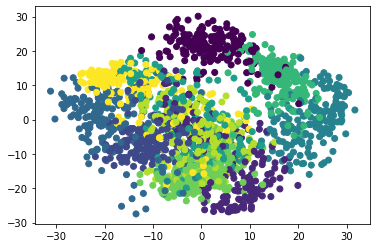

In [40]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


Text(0.5, 0, 'z')

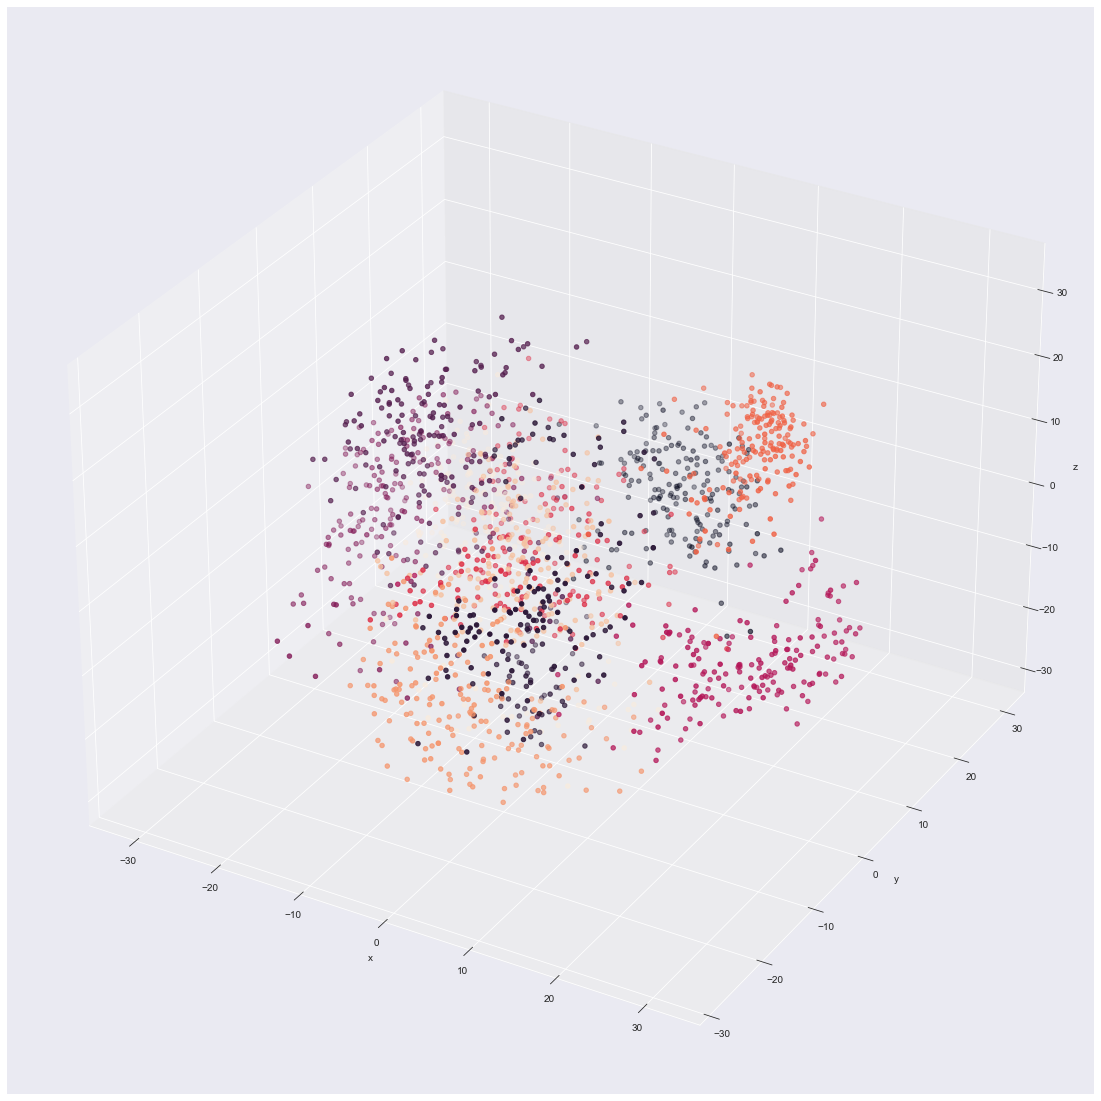

In [51]:
import seaborn as sns

model = PCA(n_components=3)
model.fit(X)
x_pca = model.transform(X)

sns.set_style("darkgrid")



plt.figure(figsize=(20,20))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(x_pca[:,0], x_pca[:,1], x_pca[:,2],c=y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')




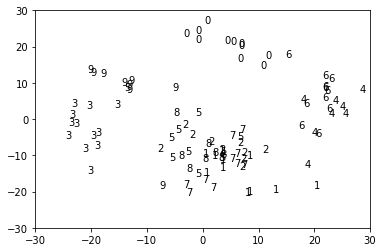

In [41]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

### Compression de données

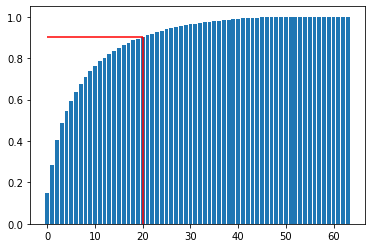

In [42]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')


In [43]:
model = PCA(n_components=0.99)
model.fit(X)

PCA(n_components=0.99)

Text(0.5, 1.0, 'Compressé')

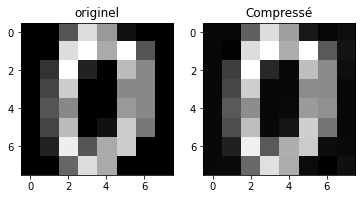

In [44]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')